# WALMART DATA CHALLENGE

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Data

In [2]:
house = pd.read_csv('household_data.csv')
products = pd.read_csv('products.csv')
trans = pd.read_csv('transaction_data.csv')

## Data Processing

In [3]:
#Merging all datasets into one

house_trans = pd.merge(trans, house , how = 'right', on = 'HSHD_NUM')
house_trans.drop(['Unnamed: 0'], axis = 1, inplace = True)
house_trans['PURCHASE_DATE']= pd.to_datetime(house_trans['PURCHASE_DATE'])
house_trans['MONTH'] = house_trans['PURCHASE_DATE'].map(lambda x: x.month)
house_trans['YEAR'] = house_trans['PURCHASE_DATE'].map(lambda x: x.year)
products = products.rename(columns={'PRODUCT_NUM                 ': 'PRODUCT_NUM'})
products = products.rename(columns={'COMMODITY                     ': 'COMMODITY'})
products = products.rename(columns={'DEPARTMENT                    ': 'DEPARTMENT'})
data = pd.merge(house_trans, products , how = 'inner', on = 'PRODUCT_NUM')

#Eliminating Negative spend values 

data['NEGATIVE']= data['SPEND_AMOUNT'].apply(lambda x: 'YES' if x<0 else 'NO')
data=data[data['NEGATIVE']=='NO']
data.reset_index(inplace=True)
data


,index,BASKET_NUM,HSHD_NUM,PURCHASE_DATE,PRODUCT_NUM,SPEND_AMOUNT,UNITS,STORE_REGION,WEEK_NUM,YEAR,...,HOMEOWNER,HSHD_COMPOSITION,HH_SIZE,CHILDREN,MONTH,DEPARTMENT,COMMODITY,BRAND_TY,NA,NEGATIVE
0,0,99471,1,2016-03-13,86729,2.69,1,EAST,11,2016,...,Homeowner,2 Adults and Kids,3,1,3,FOOD,DAIRY,PRIVATE,N,NO
1,1,438318,1,2016-11-07,86729,2.00,1,EAST,45,2016,...,Homeowner,2 Adults and Kids,3,1,11,FOOD,DAIRY,PRIVATE,N,NO
2,2,761819,1,2017-06-19,86729,1.88,1,EAST,77,2017,...,Homeowner,2 Adults and Kids,3,1,6,FOOD,DAIRY,PRIVATE,N,NO
3,3,117541,2,2016-03-25,86729,3.54,2,EAST,12,2016,...,Homeowner,2 Adults and Kids,5+,3+,3,FOOD,DAIRY,PRIVATE,N,NO
4,4,280573,2,2016-07-18,86729,3.76,2,EAST,29,2016,...,Homeowner,2 Adults and Kids,5+,3+,7,FOOD,DAIRY,PRIVATE,N,NO
5,5,778444,2,2017-07-03,86729,1.88,1,EAST,79,2017,...,Homeowner,2 Adults and Kids,5+,3+,7,FOOD,DAIRY,PRIVATE,N,NO
6,6,292428,2,2016-07-27,86729,2.49,1,EAST,30,2016,...,Homeowner,2 Adults and Kids,5+,3+,7,FOOD,DAIRY,PRIVATE,N,NO
7,7,896145,2,2017-09-23,86729,2.49,1,EAST,90,2017,...,Homeowner,2 Adults and Kids,5+,3+,9,FOOD,DAIRY,PRIVATE,N,NO
8,8,116010,3,2016-03-25,86729,1.77,1,EAST,12,2016,...,Homeowner,2 Adults,2,NOT AVAILABLE,3,FOOD,DAIRY,PRIVATE,N,NO
9,9,827017,3,2017-08-07,86729,2.49,1,EAST,84,2017,...,Homeowner,2 Adults,2,NOT AVAILABLE,8,FOOD,DAIRY,PRIVATE,N,NO


## Exploratory Data Anlysis

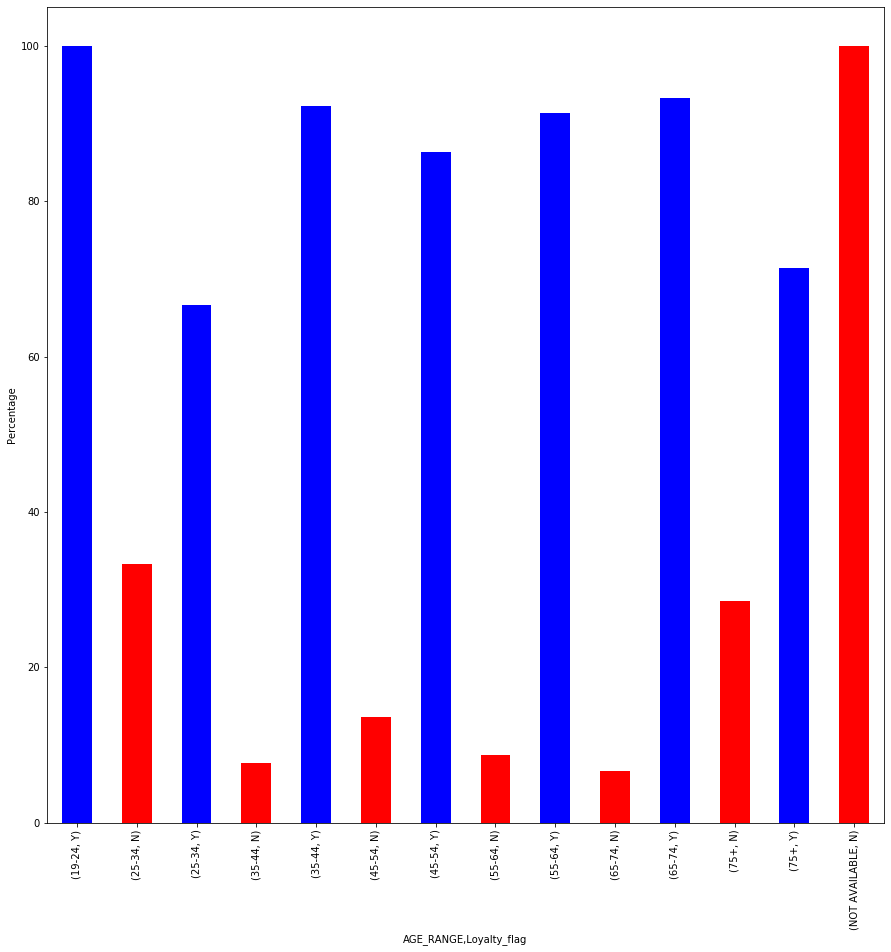

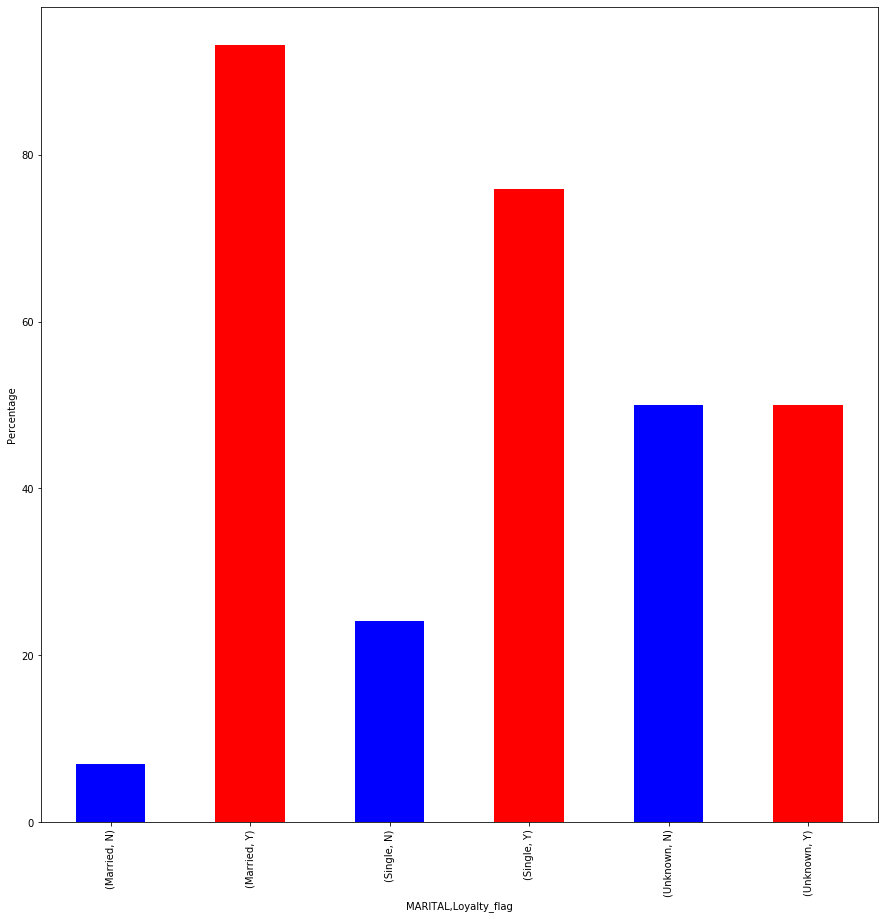

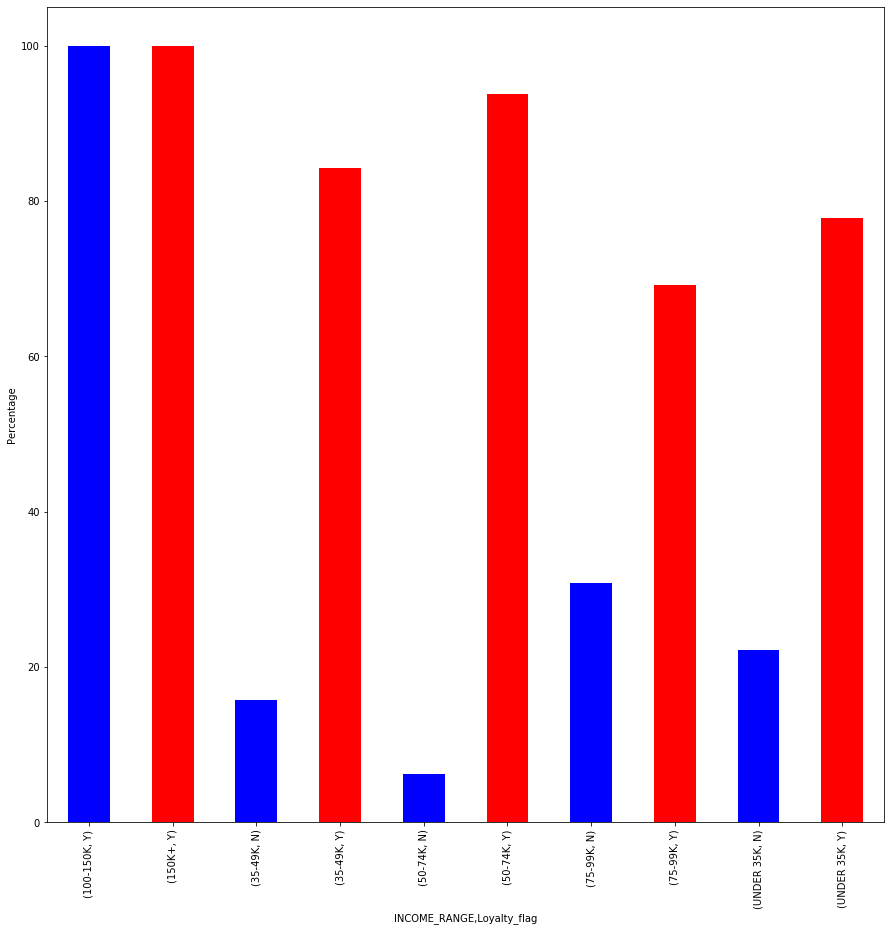

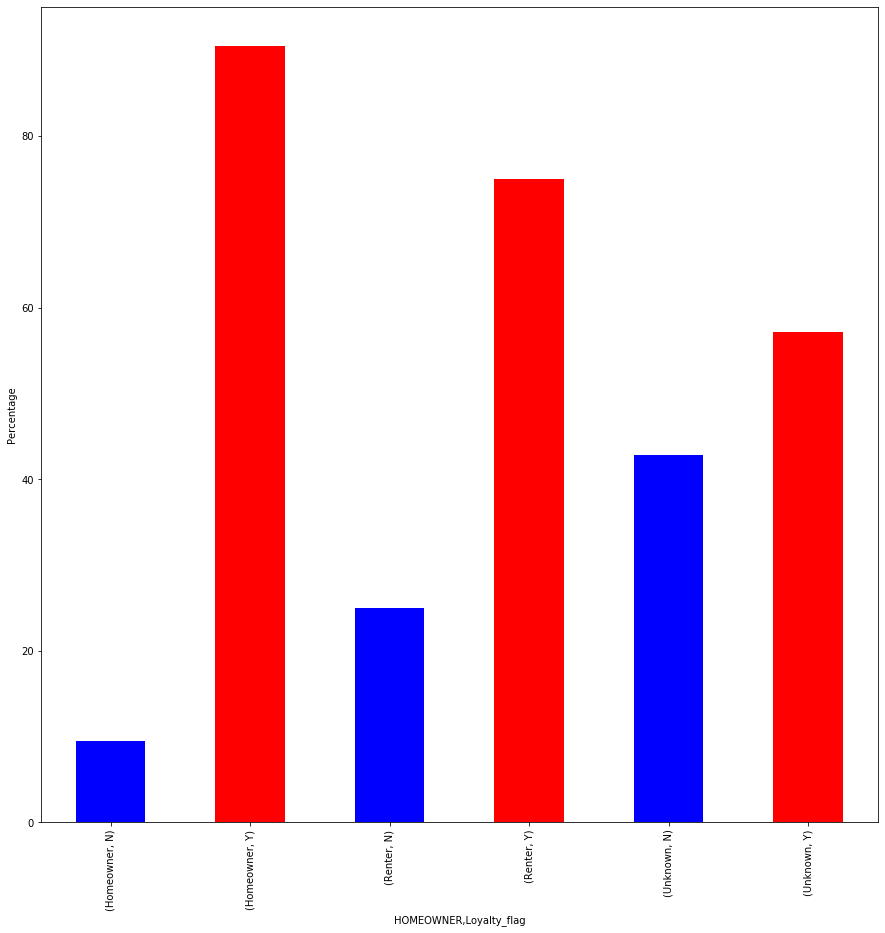

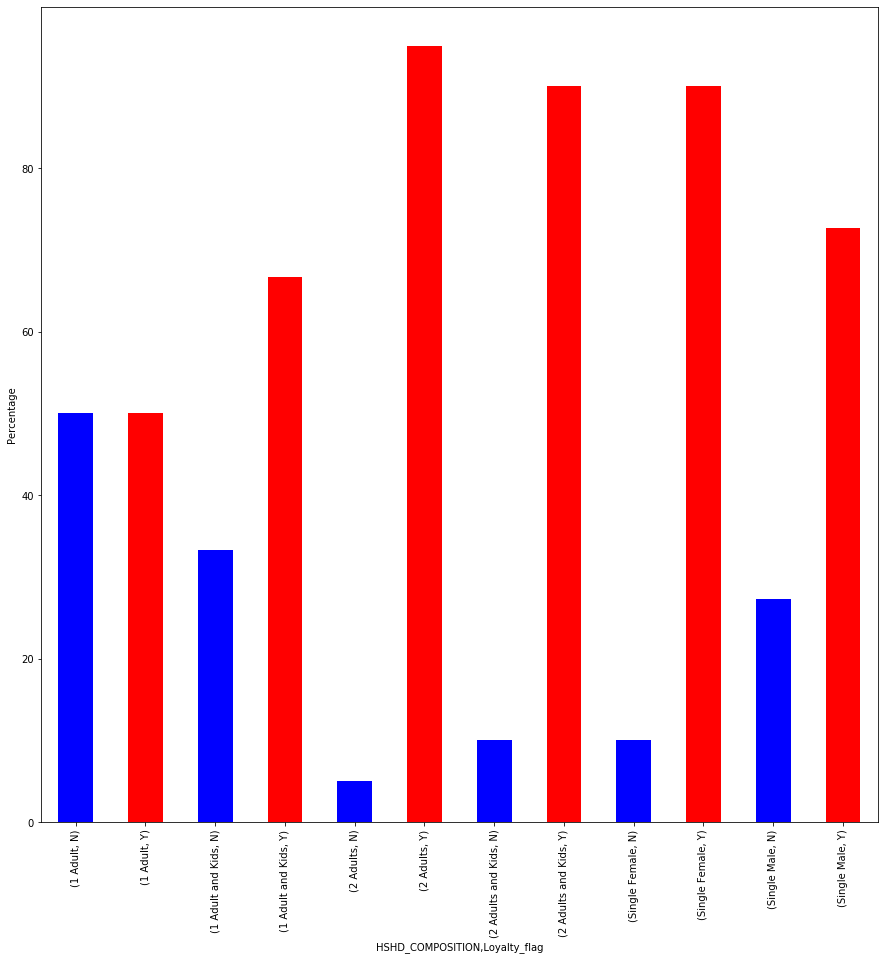

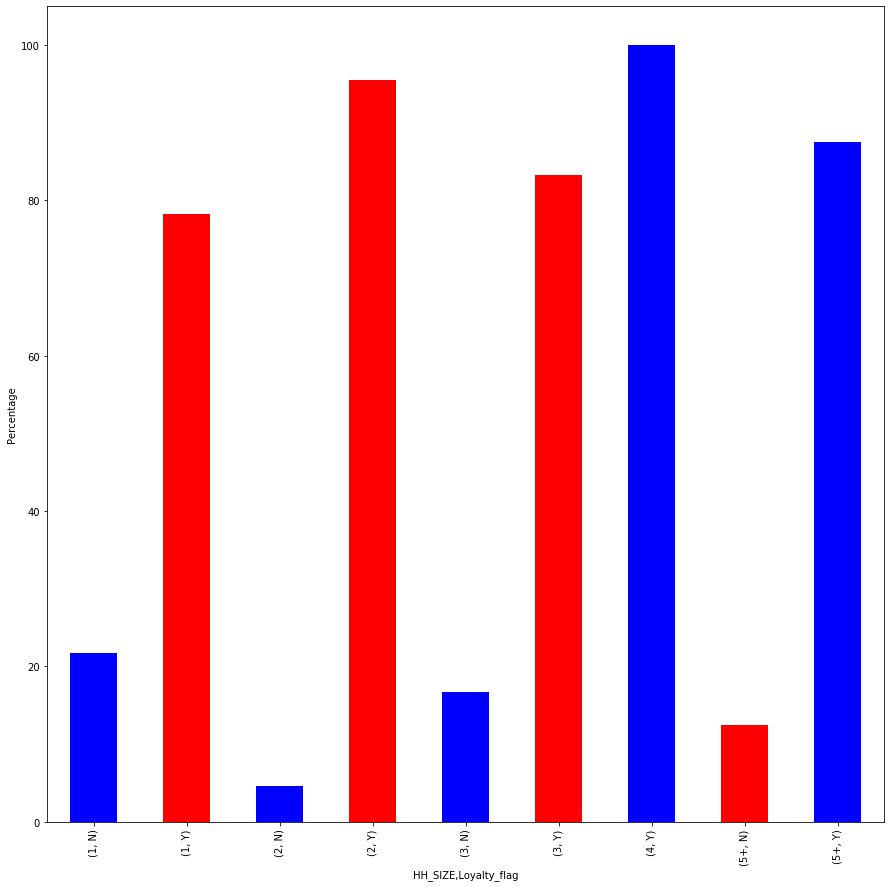

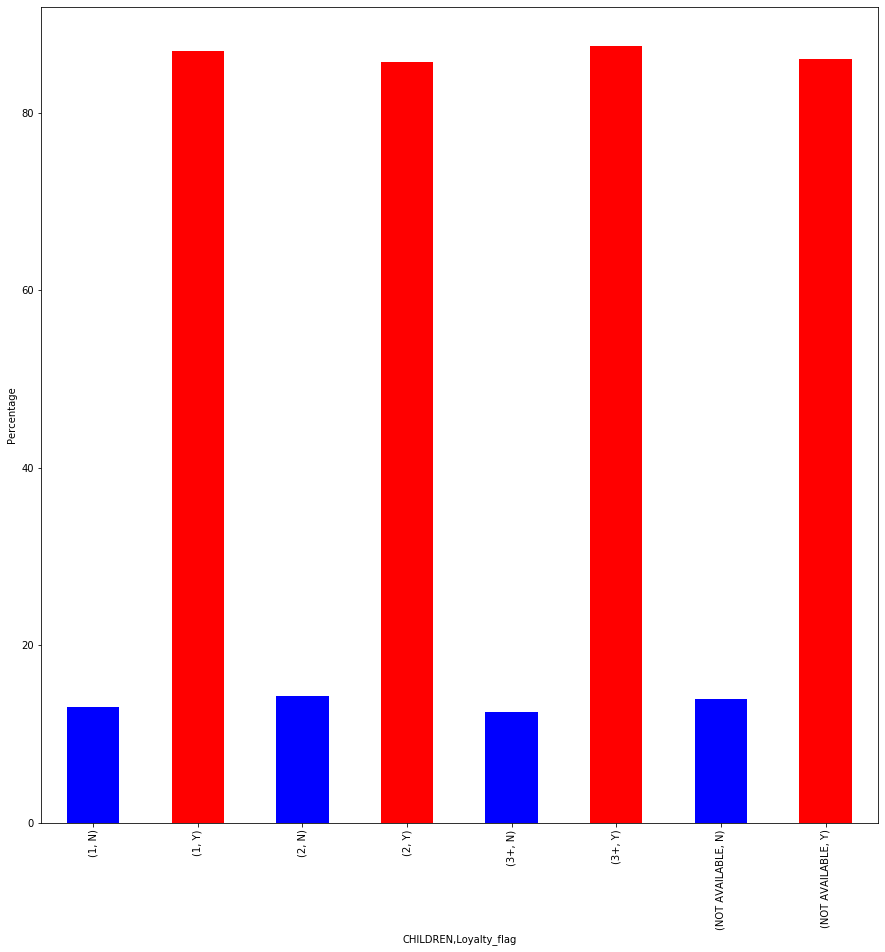

In [4]:
#Studying loyalty among different Age Groups

list_ = list(house.columns)
demographics = list_[2:]
j = 1
for i in demographics:
    age = house.groupby([i, 'Loyalty_flag']).count()
    age = age['HSHD_NUM']
    age_pcts = age.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    f, ax = plt.subplots(1,1,figsize=(15,15))
    ax = age_pcts.plot.bar(color=["Blue","Red"], rot=90)
    ax.set_ylabel("Percentage")
    plt.show()
    j+=1

### Insights from Loyalty Analysis
Disloyal to loyal ratio is high in two categories:

a. People above 75 years of age: This can be due to their unwillingness to physically go to the store and purchase products (assuming the data is for physical footfall of customers). In this case focus should be on catering to their needs

b. People in the age range of 25-25: This can be due to the preference of these customers towards online shopping, due to which their physical footfall is lower. Focus for this customer segment should be on online marketing and providing better online services.


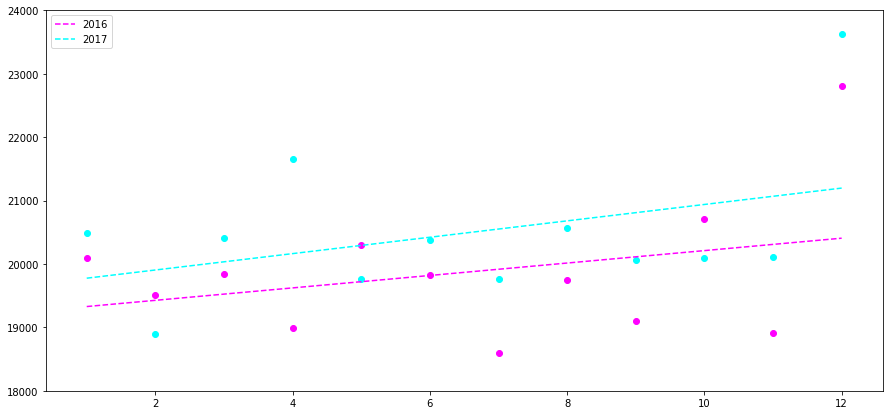

In [5]:
#Region Wise Sales Trends of Eastern region

#Dataset formation

data_2016 = house_trans[house_trans['YEAR'] == 2016]
data_2016 = data_2016.groupby(['STORE_REGION', 'MONTH', 'BASKET_NUM']).sum()['SPEND_AMOUNT']
data_2016_monthly = data_2016.groupby(level=[0,1]).apply(lambda x: x.sum())
data_2016_monthly = data_2016_monthly.unstack(level=0)
data_2017 = house_trans[house_trans['YEAR'] == 2017]
data_2017 = data_2017.groupby(['STORE_REGION', 'MONTH', 'BASKET_NUM']).sum()['SPEND_AMOUNT']
data_2017_monthly = data_2017.groupby(level=[0,1]).apply(lambda x: x.sum())
data_2017_monthly = data_2017_monthly.unstack(level=0)

#Visualizing

f, ax = plt.subplots(1,1,figsize=(15,7))
ax.scatter([x for x in range(1,13)], data_2016_monthly['EAST'], color='magenta')
z = np.polyfit([x for x in range(1,13)], data_2016_monthly['EAST'], 1)
p = np.poly1d(z)
ax.plot([x for x in range(1,13)],p([x for x in range(1,13)]),"r--", color = 'magenta', label = '2016')

ax.scatter([x for x in range(1,13)], data_2017_monthly['EAST'], color='cyan')
z1 = np.polyfit([x for x in range(1,13)], data_2017_monthly['EAST'], 1)
p1 = np.poly1d(z1)
ax.plot([x for x in range(1,13)],p1([x for x in range(1,13)]),"r--", color = 'cyan', label = '2017')
plt.ylim(top = 24000, bottom = 18000)
plt.legend(loc="upper left")
plt.show()


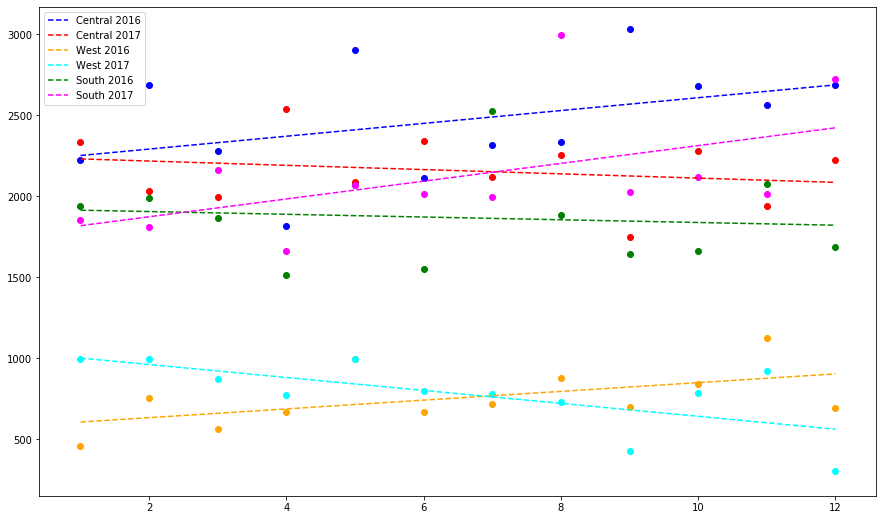

In [6]:
#Region Wise sales trend of other 3 regions

f, ax = plt.subplots(1,1,figsize=(15,9))
ax.scatter([x for x in range(1,13)], data_2016_monthly['CENTRAL'], color='blue')
z2 = np.polyfit([x for x in range(1,13)], data_2016_monthly['CENTRAL'], 1)
p2 = np.poly1d(z2)
ax.plot([x for x in range(1,13)],p2([x for x in range(1,13)]),"r--", color = 'blue', label = 'Central 2016')

ax.scatter([x for x in range(1,13)], data_2017_monthly['CENTRAL'], color='red')
z3 = np.polyfit([x for x in range(1,13)], data_2017_monthly['CENTRAL'], 1)
p3 = np.poly1d(z3)
ax.plot([x for x in range(1,13)],p3([x for x in range(1,13)]),"r--", color = 'red', label = 'Central 2017')

ax.scatter([x for x in range(1,13)], data_2016_monthly['WEST'], color='orange')
z4 = np.polyfit([x for x in range(1,13)], data_2016_monthly['WEST'], 1)
p4 = np.poly1d(z4)
ax.plot([x for x in range(1,13)],p4([x for x in range(1,13)]),"r--", color = 'orange', label = 'West 2016')

ax.scatter([x for x in range(1,13)], data_2017_monthly['WEST'], color='cyan')
z5 = np.polyfit([x for x in range(1,13)], data_2017_monthly['WEST'], 1)
p5 = np.poly1d(z5)
ax.plot([x for x in range(1,13)],p5([x for x in range(1,13)]),"r--", color = 'cyan', label = 'West 2017')

ax.scatter([x for x in range(1,13)], data_2016_monthly['SOUTH'], color='green')
z6 = np.polyfit([x for x in range(1,13)], data_2016_monthly['SOUTH'], 1)
p6 = np.poly1d(z6)
ax.plot([x for x in range(1,13)],p6([x for x in range(1,13)]),"r--", color = 'green', label = 'South 2016')

ax.scatter([x for x in range(1,13)], data_2017_monthly['SOUTH'], color='magenta')
z7 = np.polyfit([x for x in range(1,13)], data_2017_monthly['SOUTH'], 1)
p7 = np.poly1d(z7)
ax.plot([x for x in range(1,13)],p7([x for x in range(1,13)]),"r--", color = 'magenta', label = 'South 2017')

plt.legend(loc="upper left")
plt.show()

## Insights from Sales Trends

1. The sales of the eastern region are extremely high as compared to the other three regions, due to which the analysis was carried out in two different parts


2. The other three regions were combined and their sales trends were observed


3. As seen from the trendlines, the cause of concerns would be the Central and Western regions. Both of these are declining during the 2017 period as compared to the 2016 figures

In [7]:
#Product Demand Analysis

product = data.groupby(['STORE_REGION']).apply(lambda x : (x.groupby('COMMODITY').sum().sort_values('SPEND_AMOUNT', 
                                                                                         ascending = False)))
product = product[['SPEND_AMOUNT']]
product.groupby(level=0).apply(lambda x:x.sum())

,SPEND_AMOUNT
STORE_REGION,
CENTRAL,55540.11
EAST,484465.97
SOUTH,47896.90
WEST,18458.29


//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


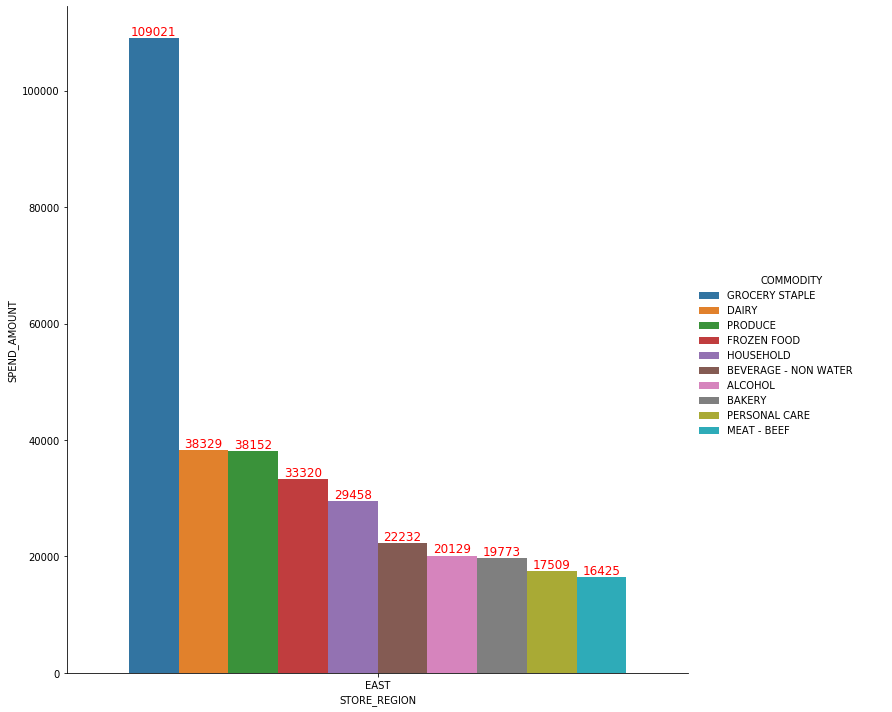

In [8]:
#Visualization
product = data.groupby(['STORE_REGION']).apply(lambda x : (x.groupby('COMMODITY').sum().sort_values('SPEND_AMOUNT', ascending = False).head(10)))
product = product[['SPEND_AMOUNT']]
product = product.reset_index(level=[0,1])
g =sns.factorplot(x='STORE_REGION', y='SPEND_AMOUNT', hue='COMMODITY', data=product[product['STORE_REGION'] == 'EAST'], kind='bar', size = 10)
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

## Insights from Product Demand Analysis

1. As seen from the product demand table, the overall revenue generated by the eastern region is extremely high as compared to the other 3 regions. Hence this analysis was focused on the product demand in the eastern region stores


2. The top 10 revenue generating products were plotted and grocery and staple foods were generating almost 180% more revenue as compared to any other product

In [9]:
#Products at Risk

#Calculating growth rates of different commodities
data['OVRMONTH'] = data['PURCHASE_DATE'].apply(lambda x: (x.month + 12) if (x.year == 2017) else x.month)
products = data.groupby(['COMMODITY', 'OVRMONTH']).sum()
temp = data.groupby(['COMMODITY']).sum().sort_values(['SPEND_AMOUNT'], ascending = False)
commodities = list(temp.index)
colors = sns.color_palette()
dict_in = {}
lis =[]
for com in commodities:
    temp1 = products[products.index.get_level_values(level = 0) == com].reset_index()
    slope, intercept = np.polyfit(temp1['OVRMONTH'], temp1['SPEND_AMOUNT'], 1)
    lis.append((com.strip(),slope,intercept))
    dict_in[com.strip(' ')] = [slope, intercept]


dict_slope = {word:dict_in[word] for word in sorted(dict_in, key = (lambda x:dict_in[x][0]), reverse = True)}

#Commodities with highest growth
lis_top = list(dict_slope.keys())[:10]

#Commodities at risk due to high decline
lis_bot = list(dict_slope.keys())[-11:-1]

#Revenue share of the commodities
tot = data.groupby(['COMMODITY']).sum()['SPEND_AMOUNT'].sum()
percent_contrib = ((data.groupby(['COMMODITY']).sum()[['SPEND_AMOUNT']]/tot)*100).reset_index().sort_values(['SPEND_AMOUNT'], ascending = False)
percent_contrib['COMMODITY'] = percent_contrib['COMMODITY'].apply(lambda x:x.strip(' '))

dict_df = pd.DataFrame(dict_slope).transpose().reset_index()
dict_df.columns = ['COMMODITY', 'SLOPE', 'INTERCEPT']
comb_df = pd.merge(percent_contrib, dict_df, how = 'right', on  = 'COMMODITY')
comb_df.columns = ['COMMODITY','PERCENT_CONTRIBUTION', 'SLOPE', 'INTERCEPT']
comb_df

,COMMODITY,PERCENT_CONTRIBUTION,SLOPE,INTERCEPT
0,GROCERY STAPLE,22.187324,17.056470,5392.433297
1,DAIRY,7.832003,6.007839,1903.661594
2,PRODUCE,7.818760,-14.575796,2157.611196
3,FROZEN FOOD,6.564186,13.486922,1489.858478
4,HOUSEHOLD,6.243075,0.234239,1574.388261
5,ALCOHOL,4.874243,13.423835,1063.682065
6,BEVERAGE - NON WATER,4.573227,2.465835,1124.605399
7,BAKERY,4.020384,-1.967109,1040.340942
8,PERSONAL CARE,3.585173,2.964626,868.738007
9,MEAT - BEEF,3.440146,-2.031370,894.546703


In [10]:
#Commodities with growth potential
top15_slope = dict_df.head(21)
bot15_slope = percent_contrib.sort_values('SPEND_AMOUNT').head(21)

opportunity = pd.merge(top15_slope, bot15_slope, how = 'inner', on = 'COMMODITY')
opportunity.columns = ['COMMODITY', 'SLOPE', 'INTERCEPT', 'PERCENT_CONTRIBUTION']
data['COMMODITY']=data['COMMODITY'].apply(lambda x: x.strip())

data_opportunity=data[data['COMMODITY']=='MEAT - TURKEY']
for f in opportunity['COMMODITY'].values[1:]:
    data_n= data[data['COMMODITY']==f]
    data_opportunity=pd.concat([data_opportunity, data_n])

opportunity

,COMMODITY,SLOPE,INTERCEPT,PERCENT_CONTRIBUTION
0,MEAT - TURKEY,3.674643,79.981123,0.498373
1,BULK PRODUCTS,3.439139,96.744928,0.553073
2,CLOTHING,2.433604,63.479529,0.371658
3,TOYS,2.183068,8.598131,0.132701
4,SPECIALTY FOOD,1.917913,81.778587,0.418572
5,HOLIDAY,1.228028,24.159546,0.117084
6,INTERNATIONAL FOOD,1.080483,219.282717,0.921386


In [11]:
#Identifying under-performing commodities
bot15_slope = dict_df.sort_values('SLOPE', ascending = True).head(21)
top15_slope = percent_contrib.sort_values('SPEND_AMOUNT', ascending = False).head(21)

risk = pd.merge(bot15_slope, top15_slope, how = 'inner', on = 'COMMODITY')
risk.columns = ['COMMODITY', 'SLOPE', 'INTERCEPT', 'PERCENT_CONTRIBUTION']
dict_ = {com: None for com in list(risk.columns)}
dict_['COMMODITY'] = ['OTHERS']
dict_['PERCENT_CONTRIBUTION'] = [100 - risk['PERCENT_CONTRIBUTION'].sum()]
risk = risk.append(pd.DataFrame(dict_))


risk

,COMMODITY,SLOPE,INTERCEPT,PERCENT_CONTRIBUTION
0,PRODUCE,-14.575796,2157.611196,7.818760
1,MEAT - CHICKEN,-5.968387,829.268587,2.986987
2,SEAFOOD,-4.003170,419.189203,1.461108
3,PET,-2.873587,509.993587,1.876401
4,MEAT - BEEF,-2.031370,894.546703,3.440146
5,BAKERY,-1.967109,1040.340942,4.020384
6,HOUSEHOLD,0.234239,1574.388261,6.243075
0,OTHERS,NaN,NaN,72.153141


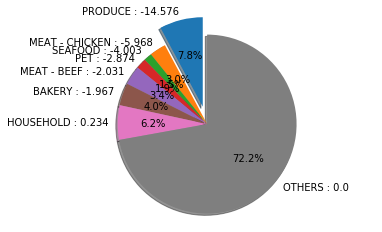

In [12]:
#Plotting commodities at risk

labels = [x + ' : ' + str(round(y, 3)) for x,y in  zip(list(risk['COMMODITY']), list(risk['SLOPE'].fillna(0)))]
sizes = risk['PERCENT_CONTRIBUTION']
explode = [0 for x in range(len(risk['COMMODITY']))]
explode[0] = 0.2
explode = tuple(explode)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [13]:
# NOTE: In the above pie chart, the values next to commodities are their growth rates 
# and the pies represent their sales contribution

## Insights from commodities at risk

1. The produce commodity has a very high decline rate of around 14%, along with a high percentage in total sales which is 7.8%


2. The cause of this decline needs to be assessed


In [14]:
#Data formation of commodities with growth potential


new_data=data_opportunity
slope_1 = list()
def get_slope(commodity, demo):
    temp_df = new_data.groupby(['COMMODITY', demo , 'OVRMONTH']).sum()
    data = temp_df[temp_df.index.get_level_values(level = 0) == commodity].reset_index()
    for i in list(data[demo].unique()):
        temp = data[data[demo] == i]    
        slope, intercept = np.polyfit(temp['SPEND_AMOUNT'], temp['OVRMONTH'], 1)
        slope_1.append((commodity, demo, i, slope))
    return slope_1
        
demographics = ['AGE_RANGE', 'MARITAL', 'INCOME_RANGE', 'HOMEOWNER', 'HSHD_COMPOSITION', 'HH_SIZE', 'CHILDREN']

for commodity in list(new_data.COMMODITY.unique()):
    for demographic in demographics:
        get_slope(commodity, demographic)

slope_df = pd.DataFrame()
slope_df['COMMODITY'] = [en[0] for en in slope_1]
slope_df['DEMOGRAPHIC'] = [en[1] for en in slope_1]
slope_df['VALUE'] = [en[2] for en in slope_1]
slope_df['SLOPE'] = [en[3] for en in slope_1]
slope_df

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()


,COMMODITY,DEMOGRAPHIC,VALUE,SLOPE
0,MEAT - TURKEY,AGE_RANGE,19-24,0.162710
1,MEAT - TURKEY,AGE_RANGE,25-34,0.025083
2,MEAT - TURKEY,AGE_RANGE,35-44,0.087769
3,MEAT - TURKEY,AGE_RANGE,45-54,0.093751
4,MEAT - TURKEY,AGE_RANGE,55-64,0.018989
5,MEAT - TURKEY,AGE_RANGE,65-74,-0.329113
6,MEAT - TURKEY,AGE_RANGE,75+,1.020408
7,MEAT - TURKEY,AGE_RANGE,NOT AVAILABLE,2.285714
8,MEAT - TURKEY,MARITAL,Married,0.009067
9,MEAT - TURKEY,MARITAL,Single,0.041299


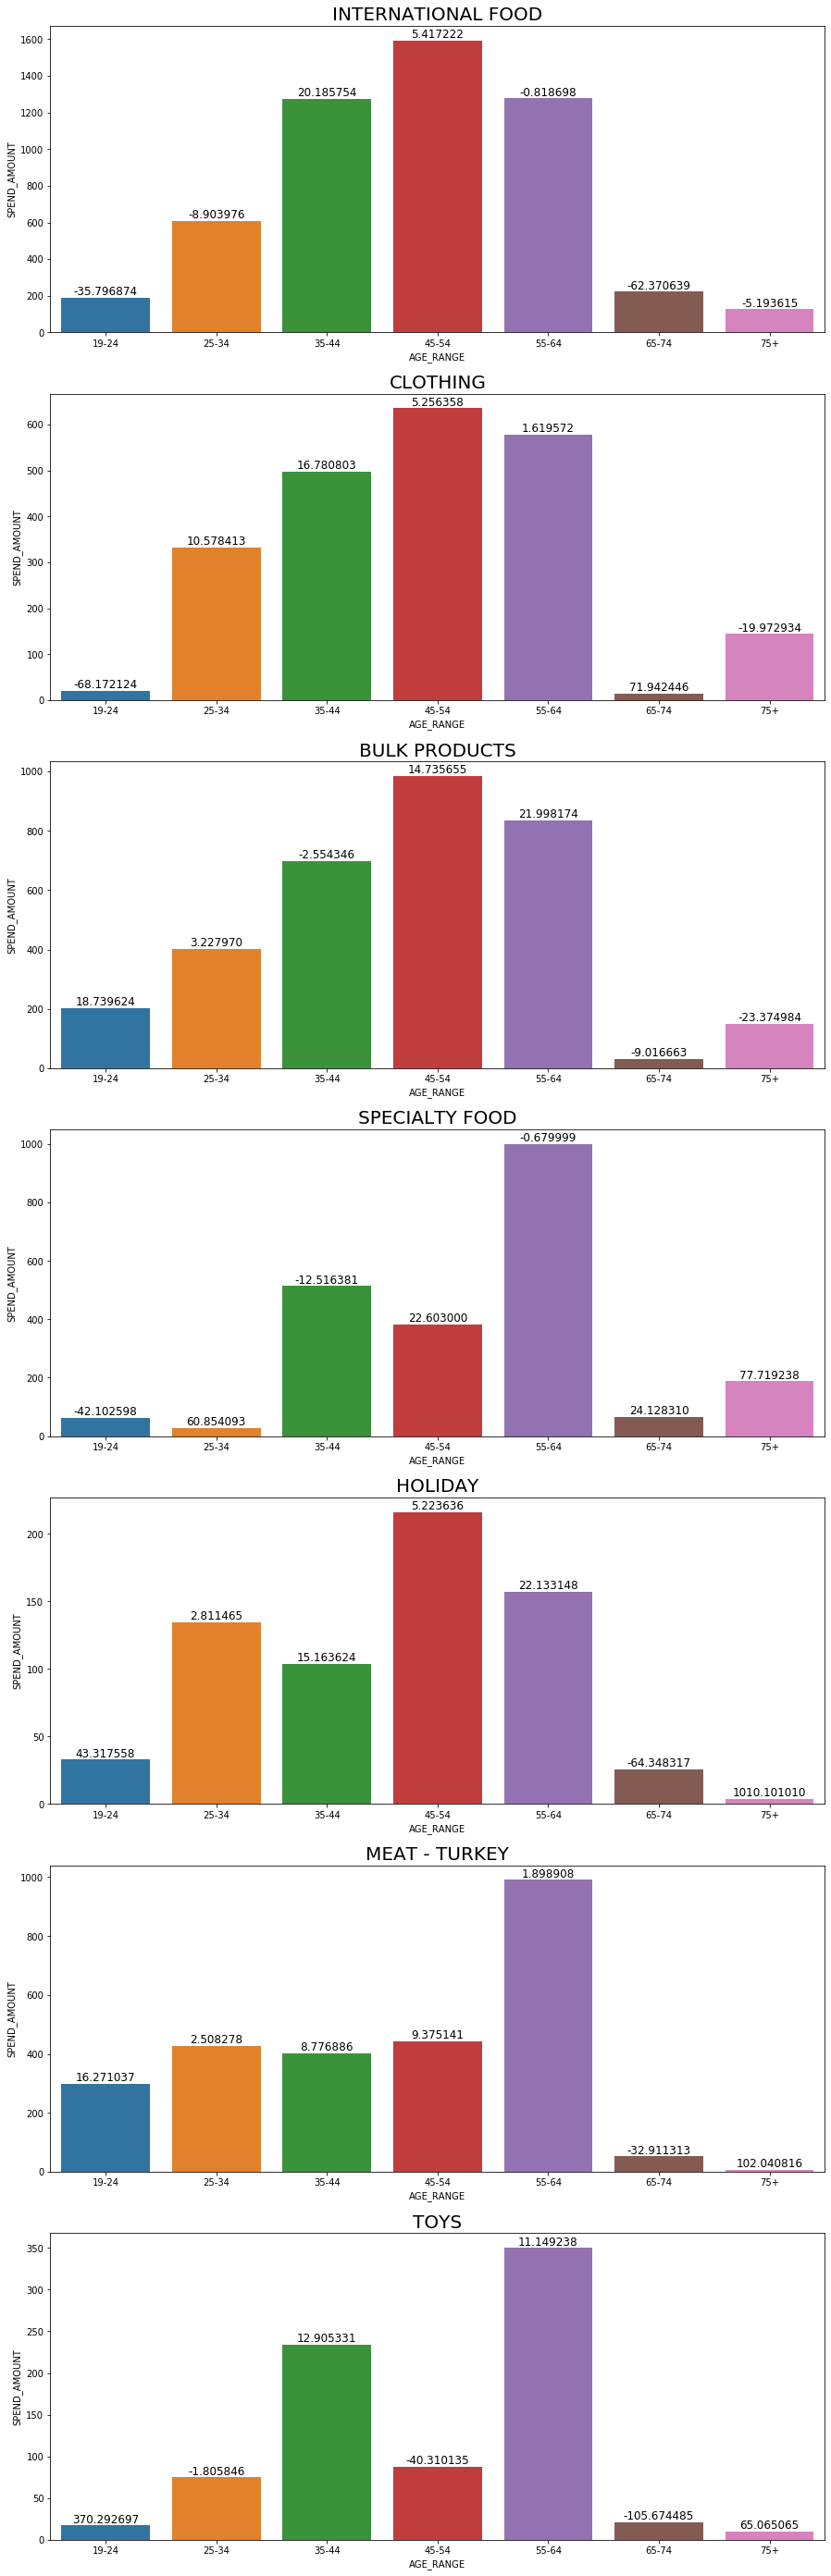

In [15]:
#Plotting high performing commodities for different demographics

def plot_graph(demo):
    tmp_demo = data.groupby([demo, 'COMMODITY']).sum().reset_index()
    tmp_demo_slope = pd.merge(tmp_demo, slope_df, how = 'inner', left_on = [demo, 'COMMODITY'], right_on = ['VALUE', 'COMMODITY'])
    tmp_demo_slope = tmp_demo_slope.drop(tmp_demo_slope[tmp_demo_slope[demo] == 'NOT AVAILABLE'].index)
    tmp_demo_slope_1 = tmp_demo_slope[[demo, 'COMMODITY', 'SLOPE', 'SPEND_AMOUNT']].groupby(['COMMODITY',demo]).sum()
    i = 0
    figs, ax = plt.subplots(7,1, figsize = (15,50))
    for com in list(set(tmp_demo_slope_1.index.get_level_values(level = 0))):
        temp2 = tmp_demo_slope_1[tmp_demo_slope_1.index.get_level_values(level = 0) == com].reset_index()
        g = sns.barplot(temp2[demo], temp2['SPEND_AMOUNT'], ax = ax[i]).set_title(com, fontsize = 20)
        lis_t = [i*100 for i in list(temp2['SLOPE'])]
        for k,p in enumerate(ax[i].patches):
            ax[i].text(p.get_x() + p.get_width()/2., p.get_height(), '%f' % float(lis_t[k]), 
                    fontsize=12, color='black', ha='center', va='bottom')  
        plt.savefig('hshd range')
        i += 1

demographics = ['AGE_RANGE', 'MARITAL', 'INCOME_RANGE', 'HOMEOWNER', 'HSHD_COMPOSITION', 'HH_SIZE', 'CHILDREN']
plot_graph('AGE_RANGE')


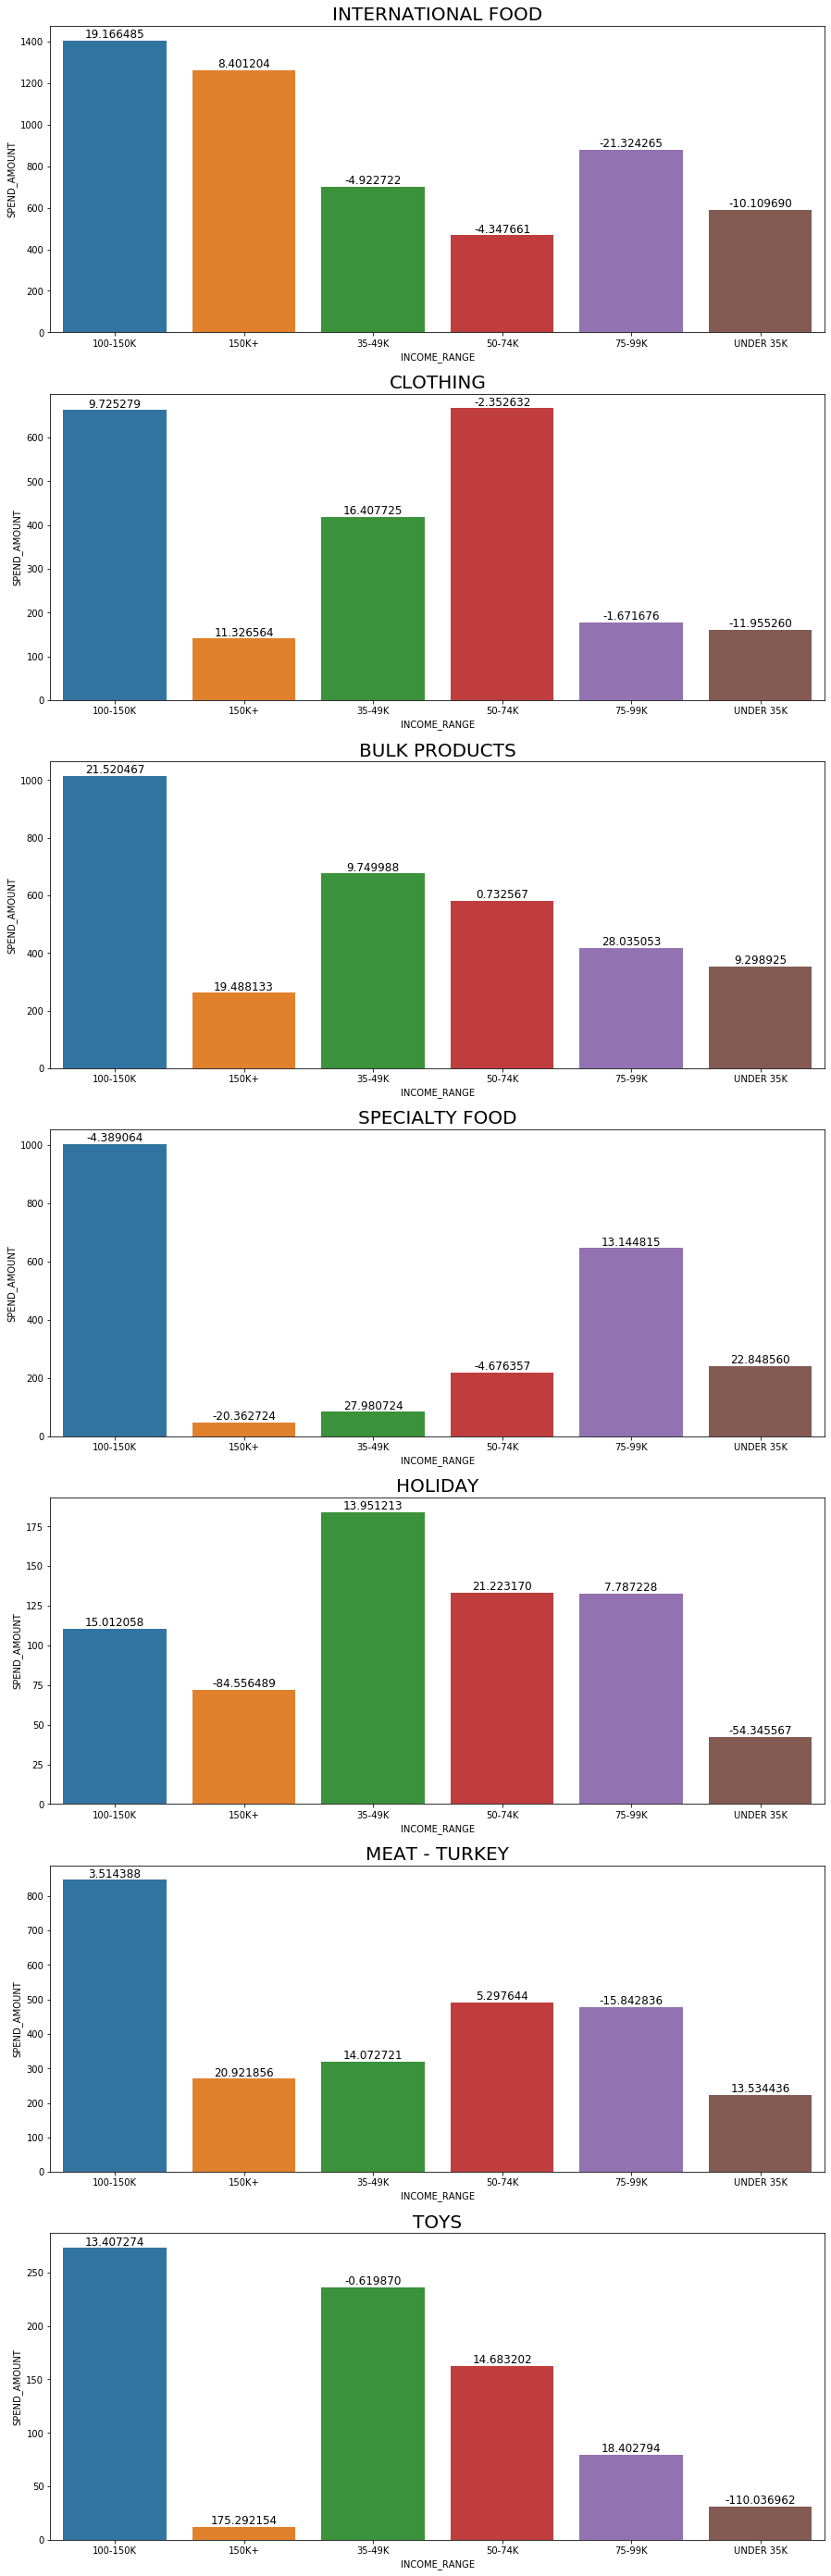

In [16]:
plot_graph('INCOME_RANGE')

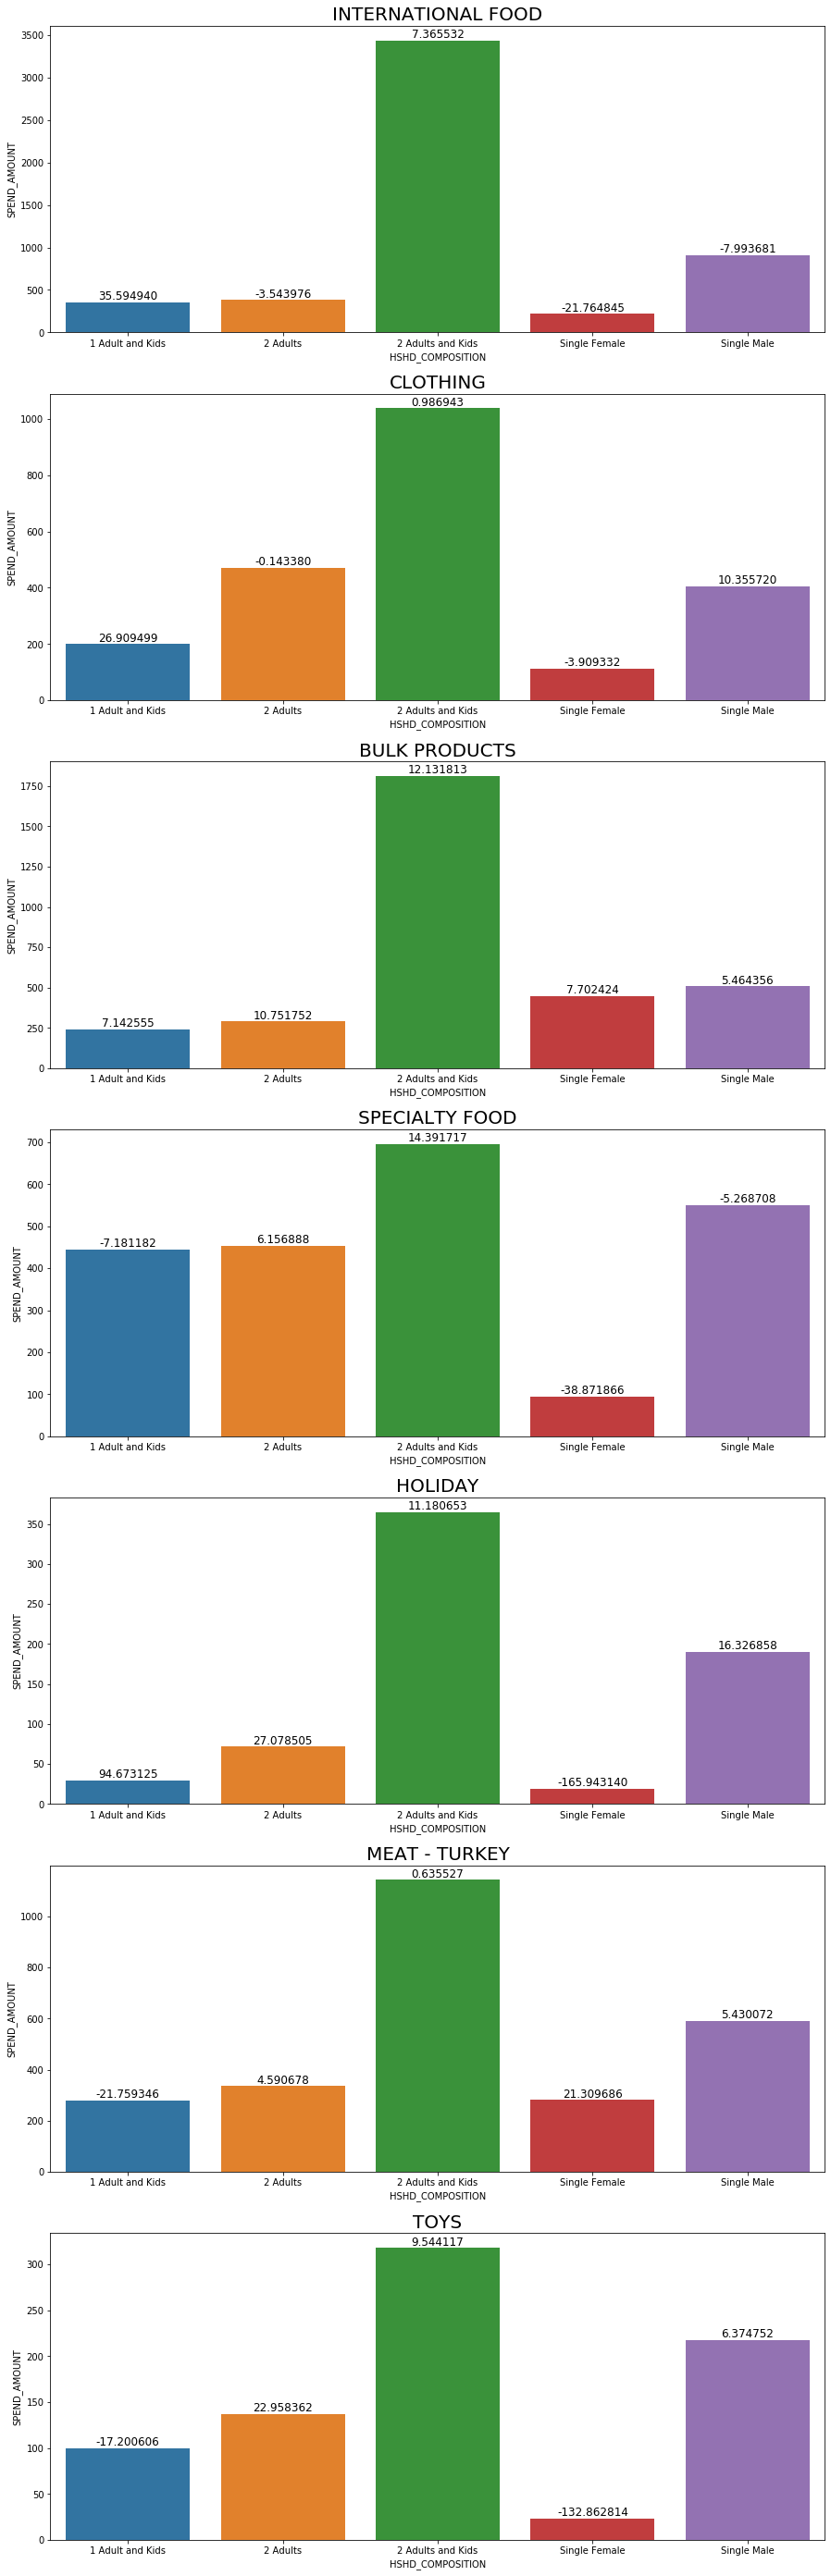

In [17]:
plot_graph('HSHD_COMPOSITION')

In [18]:
# NOTE: The values above the bars are their growth rates

## Insights from high performing commodities

1. The high performing commodities were studied against different demographics


2. As seen, the maximum potential is among the different demographics for the following products:


a. Meat-Turkey products showed a growth of 102% amongst the people above 75 years of age, but still has a lower share in total sales. This commodity can be better marketed to suit this age group


b. Families with income above 150k displayed a growing interest in toys, which had a growth of 175%  with a low share in sales. This sector can be better targeted to further expand sales


c. An adult with kids were drawn more towards holiday goods, which resulted in the growth of these goods by  94%. Hence, during holidays special emphasis should be on targeting these families